# Visualize Categorical feature i.e Customer.Municipality

In [1]:
import pickle
import pandas as pd
import numpy as np
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### adding features

In [2]:
df2 = pd.read_pickle('joined_data.pkl')

In [3]:
df2.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,...,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,...,Utrecht,52.090737,5.12142,Utrecht,6,11,2019-05-08,2,MonthlySubscriptionPrice,45.640142
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,...,Hoogeveen,52.728616,6.49010,Drenthe,8,12,2019-04-16,2,MonthlySubscriptionPrice,21.871447


In [4]:
df2=df2.rename(index=str, columns={"Customer.Municipality": "municipality"})

In [5]:
df2.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,...,municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,...,Utrecht,52.090737,5.12142,Utrecht,6,11,2019-05-08,2,MonthlySubscriptionPrice,45.640142
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,...,Hoogeveen,52.728616,6.49010,Drenthe,8,12,2019-04-16,2,MonthlySubscriptionPrice,21.871447


In [6]:
my_df=df2['municipality']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df2['municipality'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [8]:
len(cvec.get_feature_names())

357

In [9]:
zero_doc_matrix = cvec.transform(df2[df2['Churn.Status'] == 0].municipality)
one_doc_matrix = cvec.transform(df2[df2['Churn.Status'] == 1].municipality)

In [10]:
import numpy as np
zero_tf = np.sum(zero_doc_matrix,axis=0)
one_tf = np.sum(one_doc_matrix,axis=0)

In [11]:
neg = np.squeeze(np.asarray(zero_tf))
pos = np.squeeze(np.asarray(one_tf))

In [12]:
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names())

In [13]:
term_freq_df.head()

,aalburg,aalten,aan,achtkarspelen,alblasserdam,albrandswaard,alkmaar,almelo,almere,alphen,...,zoetermeer,zoeterwoude,zoom,zuidhorn,zuidplas,zundert,zutphen,zwartewaterland,zwijndrecht,zwolle
0,0,1,10,1,0,1,6,7,13,5,...,3,1,1,1,2,3,4,2,2,9
1,1,1,10,0,1,2,4,3,10,4,...,3,0,2,1,2,2,1,1,3,4


In [14]:
term_freq_df=term_freq_df.transpose()

In [15]:
term_freq_df.head()

,0,1
aalburg,0,1
aalten,1,1
aan,10,10
achtkarspelen,1,0
alblasserdam,0,1


In [16]:
term_freq_df.columns = ['loyal', 'churn']

In [17]:
term_freq_df['total'] = term_freq_df['loyal'] + term_freq_df['churn']

In [18]:
term_freq_df.head()

,loyal,churn,total
aalburg,0,1,1
aalten,1,1,2
aan,10,10,20
achtkarspelen,1,0,1
alblasserdam,0,1,1


In [19]:
term_freq_df.sort_values(by='total', ascending=False).head()

,loyal,churn,total
den,25,34,59
rotterdam,20,38,58
amsterdam,18,39,57
haag,17,24,41
almere,13,10,23


In [20]:
len(term_freq_df)

357

In [21]:
term_freq_df.shape

(357, 3)

In [22]:
term_freq_df.to_pickle('term_freq_mat.pkl')

Text(0.5, 1.0, 'No. of Municipalities')

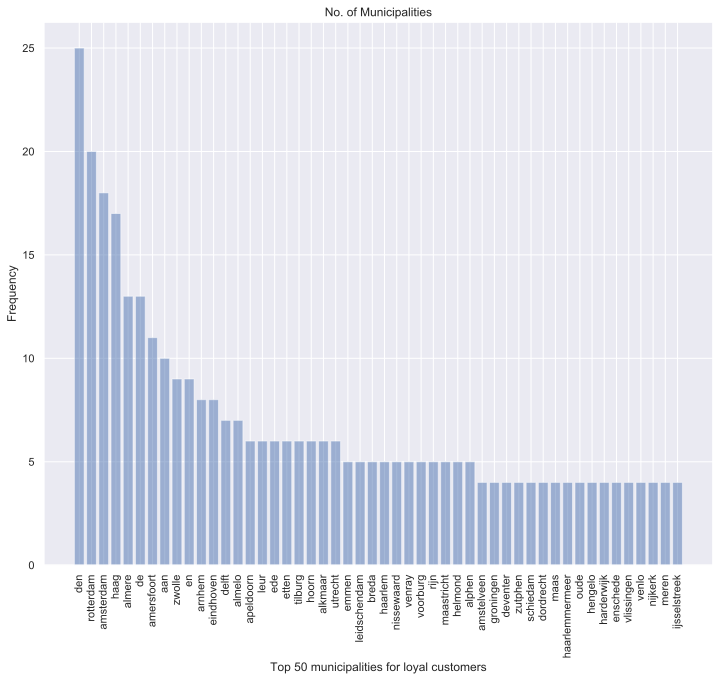

In [23]:
y_one = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_one, term_freq_df.sort_values(by='loyal', ascending=False)['loyal'][:50], align='center', alpha=0.5)
plt.xticks(y_one, term_freq_df.sort_values(by='loyal', ascending=False)['loyal'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 municipalities for loyal customers')
plt.title('No. of Municipalities')

Text(0.5, 1.0, 'Number of Municipalities')

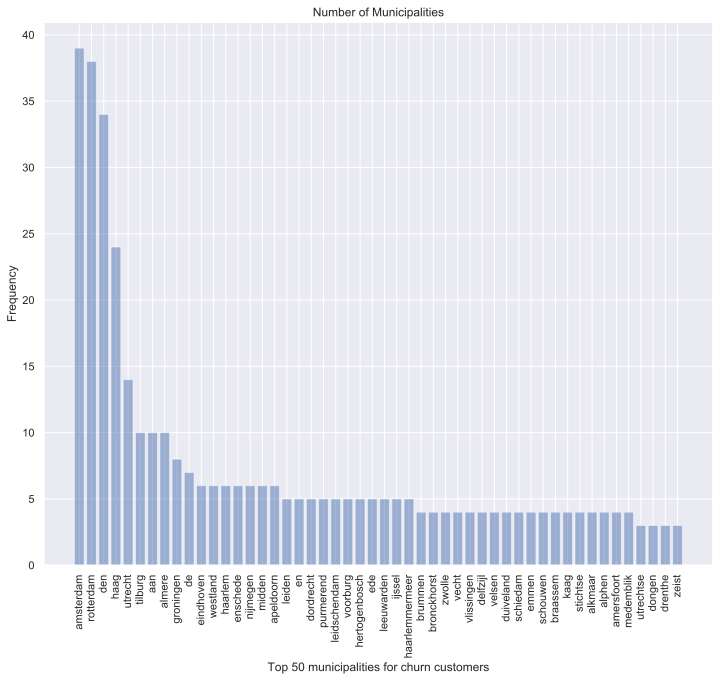

In [24]:
y_one = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_one, term_freq_df.sort_values(by='churn', ascending=False)['churn'][:50], align='center', alpha=0.5)
plt.xticks(y_one, term_freq_df.sort_values(by='churn', ascending=False)['churn'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 municipalities for churn customers')
plt.title('Number of Municipalities')

This is annoying. Den is in both cases. This brings us back to balanced classes and rather an ideal scenario. One may find this kind of analysis useful in comparison if classes are imbalenced. Then we could extract or assume some basic inferences from location variables.

**we plot, loyal frequency on X-axis, and churn frequency on Y-axis**

Text(0.5, 1.0, 'Loyalty Frequency vs Churn Frequency')

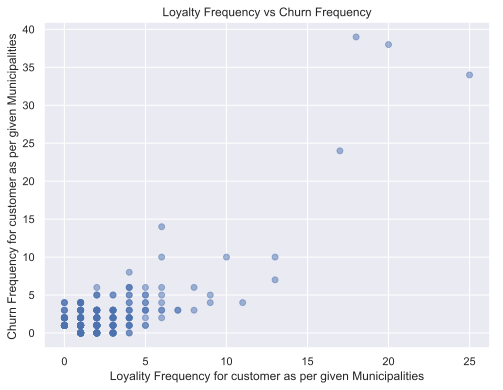

In [25]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="loyal", y="churn",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Churn Frequency for customer as per given Municipalities ')
plt.xlabel('Loyality Frequency for customer as per given Municipalities')
plt.title('Loyalty Frequency vs Churn Frequency')

Most of the words are below 10 on both X-axis and Y-axis, and we cannot see a meaningful relation between loyal and churn frequency.

In order to come up with a meaningful metric which can characterise important tokens in each class, I borrowed a metric presented by Jason Kessler in PyData 2017 Seattle. In the talk, he presented a Python library called Scattertext. Even though I did not make use of the library, the metrics used in the Scattertext as a way of visualising text data are very useful in filtering meaningful tokens from the frequency data.

Intuitively, if a word appears more often in one class compared to another, this can be a good measure of how much the word is meaningful to characterise the class. In the below code I named it as 'churn_rate',

**loyalty_rate=(loyalt frequency/loyalt frequency+churn frequency)**

In [26]:
term_freq_df['loyalty_rate'] = term_freq_df['loyal'] * 1./term_freq_df['total']

In [27]:
term_freq_df.head()

,loyal,churn,total,loyalty_rate
aalburg,0,1,1,0.0
aalten,1,1,2,0.5
aan,10,10,20,0.5
achtkarspelen,1,0,1,1.0
alblasserdam,0,1,1,0.0


Another metric is the frequency a words occurs in the class is called positive frequency pct.Let's see from our context. This is defined as $${loyalty\_freq\_pct} = \frac {loyalty\ frequency} {\Sigma loyalty\ frequency}$$

In [28]:
term_freq_df['loyal_freq_pct'] = term_freq_df['loyal'] * 1./term_freq_df['loyal'].sum()
term_freq_df.head()

,loyal,churn,total,loyalty_rate,loyal_freq_pct
aalburg,0,1,1,0.0,0.000000
aalten,1,1,2,0.5,0.001333
aan,10,10,20,0.5,0.013333
achtkarspelen,1,0,1,1.0,0.001333
alblasserdam,0,1,1,0.0,0.000000


But since pos_freq_pct is just the frequency scaled over the total sum of the frequency, the rank of pos_freq_pct is exactly same as just the positive frequency.

What we can do now is to combine pos_rate, pos_freq_pct together to come up with a metric which reflects both pos_rate and pos_freq_pct. Even though both of these can take a value ranging from 0 to 1, pos_rate has much wider range actually spanning from 0 to 1, while all the pos_freq_pct values are squashed within the range smaller than 0.015. If we average these two numbers, pos_rate will be too dominant, and will not reflect both metrics effectively.

So here we use harmonic mean instead of arithmetic mean. "Since the harmonic mean of a list of numbers tends strongly toward the least elements of the list, it tends (compared to the arithmetic mean) to mitigate the impact of large outliers and aggravate the impact of small ones." The harmonic mean H of the positive real number x1,x2,...xn is defined as $${H} = \frac {n}{\sum_{i=1}^{n}\ \frac{1}{x_i}}$$

In [29]:
from scipy.stats import hmean

term_freq_df['loy_hmean'] = term_freq_df.apply(lambda x: (hmean([x['loyalty_rate'], x['loyal_freq_pct']])
                                                                   if x['loyalty_rate'] > 0 and x['loyal_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df.head()

,loyal,churn,total,loyalty_rate,loyal_freq_pct,loy_hmean
aalburg,0,1,1,0.0,0.000000,0.000000
aalten,1,1,2,0.5,0.001333,0.002660
aan,10,10,20,0.5,0.013333,0.025974
achtkarspelen,1,0,1,1.0,0.001333,0.002663
alblasserdam,0,1,1,0.0,0.000000,0.000000


The harmonic mean rank seems like the same as pos_freq_pct. By calculating the harmonic mean, the impact of small value (in this case, pos_freq_pct) is too aggravated and ended up dominating the mean value. This is again exactly same as just the frequency value rank and doesn't provide a meaningful result.

What we can try next is to get the CDF (Cumulative Distribution Function) value of both pos_rate and pos_freq_pct. CDF can be explained as "distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x". By calculating CDF value, we can see where the value of either pos_rate or pos_freq_pct lies in the distribution in terms of cumulative manner. In the below result of the code, we can see a word "welcome" with pos_rate_normcdf of 0.995625, and pos_freq_pct_normcdf of 0.999354. This means roughly 99.56% of the tokens will take a pos_rate value less than or equal to 0.91535, and 99.99% will take a pos_freq_pct value less than or equal to 0.001521.

Next, we calculate a harmonic mean of these two CDF values, as we did earlier. By calculating the harmonic mean, we can see that pos_normcdf_hmean metric provides a more meaningful measure of how important a word is within the class.

In [30]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df['loy_rate_normcdf'] = normcdf(term_freq_df['loyalty_rate'])
term_freq_df['loy_freq_pct_normcdf'] = normcdf(term_freq_df['loyal_freq_pct'])
term_freq_df['loy_normcdf_hmean'] = hmean([term_freq_df['loy_rate_normcdf'], term_freq_df['loy_freq_pct_normcdf']])
term_freq_df.head()

,loyal,churn,total,loyalty_rate,loyal_freq_pct,loy_hmean,loy_rate_normcdf,loy_freq_pct_normcdf,loy_normcdf_hmean
aalburg,0,1,1,0.0,0.000000,0.000000,0.057140,0.221777,0.090868
aalten,1,1,2,0.5,0.001333,0.002660,0.448907,0.344029,0.389532
aan,10,10,20,0.5,0.013333,0.025974,0.448907,0.998017,0.619268
achtkarspelen,1,0,1,1.0,0.001333,0.002663,0.906983,0.344029,0.498842
alblasserdam,0,1,1,0.0,0.000000,0.000000,0.057140,0.221777,0.090868


**apply the same calculation to churn frequency of each word**

In [31]:
term_freq_df['churn_rate'] = term_freq_df['churn'] * 1./term_freq_df['total']
term_freq_df['churn_freq_pct'] = term_freq_df['churn'] * 1./term_freq_df['churn'].sum()
term_freq_df['churn_hmean'] = term_freq_df.apply(lambda x: (hmean([x['churn_rate'], x['churn_freq_pct']])
                                                                   if x['churn_rate'] > 0 and x['churn_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df['churn_rate_normcdf'] = normcdf(term_freq_df['churn_rate'])
term_freq_df['churn_freq_pct_normcdf'] = normcdf(term_freq_df['churn_freq_pct'])
term_freq_df['churn_normcdf_hmean'] = hmean([term_freq_df['churn_rate_normcdf'], term_freq_df['churn_freq_pct_normcdf']])

### let's see both in terms of churn and loyal trends

In [32]:
term_freq_df.sort_values(by='churn_normcdf_hmean', ascending=False).iloc[:10]

,loyal,churn,total,loyalty_rate,loyal_freq_pct,loy_hmean,loy_rate_normcdf,loy_freq_pct_normcdf,loy_normcdf_hmean,churn_rate,churn_freq_pct,churn_hmean,churn_rate_normcdf,churn_freq_pct_normcdf,churn_normcdf_hmean
utrecht,6,14,20,0.300000,0.008000,0.015584,0.239239,0.922498,0.379944,0.700000,0.019231,0.037433,0.760761,0.998960,0.863739
amsterdam,18,39,57,0.315789,0.024000,0.044610,0.253685,1.000000,0.404703,0.684211,0.053571,0.099363,0.746315,1.000000,0.854731
rotterdam,20,38,58,0.344828,0.026667,0.049505,0.281403,1.000000,0.439210,0.655172,0.052198,0.096692,0.718597,1.000000,0.836260
midden,2,6,8,0.250000,0.002667,0.005277,0.196598,0.485331,0.279839,0.750000,0.008242,0.016304,0.803402,0.846013,0.824157
groningen,4,8,12,0.333333,0.005333,0.010499,0.270258,0.755735,0.398138,0.666667,0.010989,0.021622,0.729742,0.937518,0.820683
tilburg,6,10,16,0.375000,0.008000,0.015666,0.311667,0.922498,0.465922,0.625000,0.013736,0.026882,0.688333,0.979772,0.808593
delfzijl,0,4,4,0.000000,0.000000,0.000000,0.057140,0.221777,0.090868,1.000000,0.005495,0.010929,0.942860,0.693113,0.798924
duiveland,0,4,4,0.000000,0.000000,0.000000,0.057140,0.221777,0.090868,1.000000,0.005495,0.010929,0.942860,0.693113,0.798924
schouwen,0,4,4,0.000000,0.000000,0.000000,0.057140,0.221777,0.090868,1.000000,0.005495,0.010929,0.942860,0.693113,0.798924
haag,17,24,41,0.414634,0.022667,0.042984,0.353412,1.000000,0.522253,0.585366,0.032967,0.062419,0.646588,1.000000,0.785367


In [33]:
term_freq_df.sort_values(by='loy_normcdf_hmean', ascending=False).iloc[:10]

,loyal,churn,total,loyalty_rate,loyal_freq_pct,loy_hmean,loy_rate_normcdf,loy_freq_pct_normcdf,loy_normcdf_hmean,churn_rate,churn_freq_pct,churn_hmean,churn_rate_normcdf,churn_freq_pct_normcdf,churn_normcdf_hmean
amersfoort,11,4,15,0.733333,0.014667,0.028758,0.708369,0.999414,0.829091,0.266667,0.005495,0.010767,0.291631,0.693113,0.410529
helmond,5,1,6,0.833333,0.006667,0.013228,0.799207,0.854827,0.826082,0.166667,0.001374,0.002725,0.200793,0.394547,0.266141
maastricht,5,1,6,0.833333,0.006667,0.013228,0.799207,0.854827,0.826082,0.166667,0.001374,0.002725,0.200793,0.394547,0.266141
heerenveen,4,0,4,1.000000,0.005333,0.010610,0.906983,0.755735,0.824480,0.000000,0.000000,0.000000,0.093017,0.299833,0.141986
nijkerk,4,0,4,1.000000,0.005333,0.010610,0.906983,0.755735,0.824480,0.000000,0.000000,0.000000,0.093017,0.299833,0.141986
arnhem,8,3,11,0.727273,0.010667,0.021025,0.702305,0.984282,0.819722,0.272727,0.004121,0.008119,0.297695,0.597662,0.397430
hoorn,6,2,8,0.750000,0.008000,0.015831,0.724742,0.922498,0.811750,0.250000,0.002747,0.005435,0.275258,0.495973,0.354033
zwolle,9,4,13,0.692308,0.012000,0.023591,0.666251,0.994069,0.797798,0.307692,0.005495,0.010796,0.333749,0.693113,0.450549
delft,7,3,10,0.700000,0.009333,0.018421,0.674332,0.963014,0.793224,0.300000,0.004121,0.008130,0.325668,0.597662,0.421603
almelo,7,3,10,0.700000,0.009333,0.018421,0.674332,0.963014,0.793224,0.300000,0.004121,0.008130,0.325668,0.597662,0.421603


let's see how the values are converted on a plot. In order to compare, we will first plot loyal_hmean vs churn_hmean, and loyal_normcdf_hmean vs churn_normcdf_hmean.

Text(0.5, 1.0, 'Loyal_hmean vs Churn_hmean')

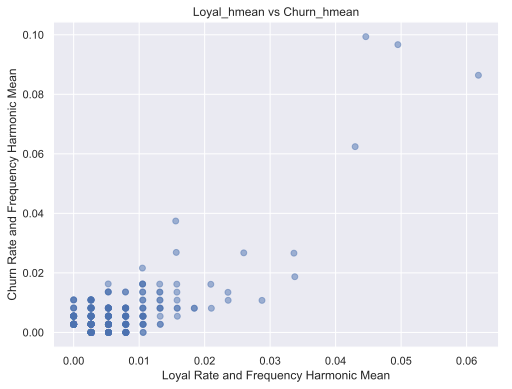

In [34]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="loy_hmean", y="churn_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Churn Rate and Frequency Harmonic Mean')
plt.xlabel('Loyal Rate and Frequency Harmonic Mean')
plt.title('Loyal_hmean vs Churn_hmean')

Not much difference from the just frequency of churn and loyality trend as before. How about the CDF harmonic mean?

Text(0.5, 1.0, 'Loyal_normcdf_hmean vs Churn_normcdf_hmean')

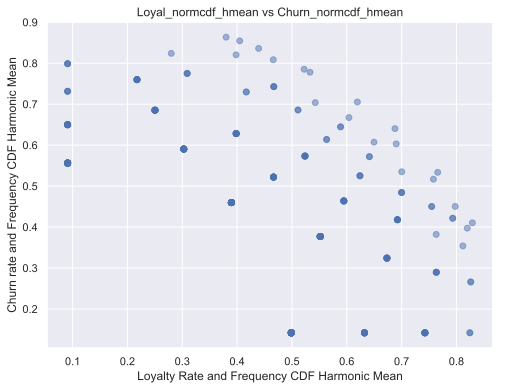

In [35]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="loy_normcdf_hmean", y="churn_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Churn rate and Frequency CDF Harmonic Mean')
plt.xlabel('Loyalty Rate and Frequency CDF Harmonic Mean')
plt.title('Loyal_normcdf_hmean vs Churn_normcdf_hmean')

It seems like the harmonic mean of rate CDF and frequency CDF has created an interesting pattern on the plot. If a data point is near to upper mid-leftish corner, it is more of churn related trend, and if it is closer to the bottom right corner, it is more loyal trend.

In [36]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df.churn_normcdf_hmean), high=max(term_freq_df.churn_normcdf_hmean))
p = figure(x_axis_label='loy_normcdf_hmean', y_axis_label='churn_normcdf_hmean')
p.circle('loy_normcdf_hmean','churn_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df,color={'field': 'churn_normcdf_hmean', 'transform': color_mapper})
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...